In [227]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

train_data_df = pd.read_csv(r'D:\\datasets\GAT\Admission_Predict.csv')
train_data_df.head(4)


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80


In [228]:
train_data_df.dtypes
print(train_data_df.shape)


(400, 9)


In [229]:
train_data_df.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance_of_Admit      0
dtype: int64

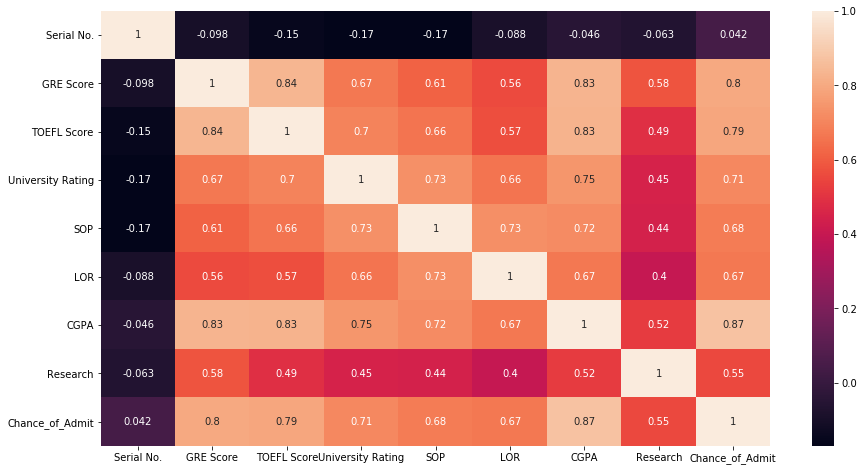

In [230]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data_df.corr(), annot=True)

From above the Parameters with High Corelation against 'Chance of Admit' are:

1.GRE Score

2.TOEFL Score

3.CGPA

# Disribution of Parameters

D:\Python1\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
D:\Python1\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
D:\Python1\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
D:\Python1\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.

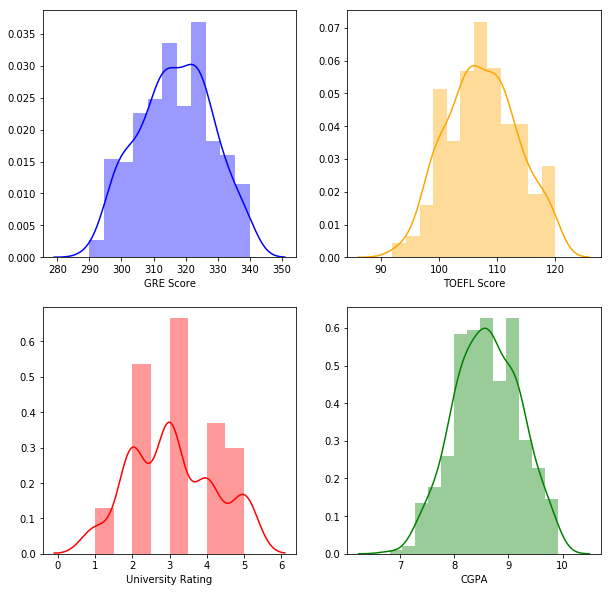

In [231]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.distplot(train_data_df['GRE Score'],color='blue')

plt.subplot(2,2,2)
sns.distplot(train_data_df['TOEFL Score'],color='orange')

plt.subplot(2,2,3)
sns.distplot(train_data_df['University Rating'],color='red')

plt.subplot(2,2,4)
sns.distplot(train_data_df['CGPA'],color='green')


plt.show()

In [232]:
Students_Research=train_data_df['Research'].value_counts()
Students_Research=dict(Students_Research)
Students_Research

{1: 219, 0: 181}

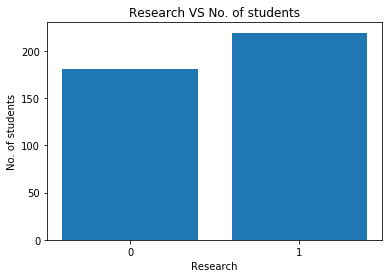

In [233]:
plt.title('Research VS No. of students')
plt.xticks([0,1])
plt.xlabel('Research')
plt.ylabel('No. of students')
plt.bar(list(Students_Research.keys()),list(Students_Research.values()))
plt.show()

In [234]:
print('Percentage of students with reasearch :{} %'.format((((train_data_df['Research']==1).sum())/train_data_df.shape[0])*100))

Percentage of students with reasearch :54.75 %


In [235]:
university_rankings=train_data_df['University Rating'].value_counts()
print(university_rankings)
university_rankings=dict(university_rankings)


3    133
2    107
4     74
5     60
1     26
Name: University Rating, dtype: int64


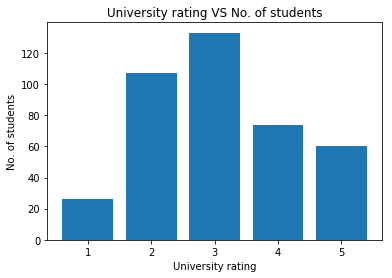

In [236]:
plt.title('University rating VS No. of students')
plt.xticks([1,2,3,4,5])
plt.xlabel('University rating')
plt.ylabel('No. of students')
plt.bar(list(university_rankings.keys()),list(university_rankings.values()))
plt.show()

In [237]:
university_rankings_admitted=train_data_df[train_data_df['Chance_of_Admit'] >= 0.75]['University Rating'].value_counts()
print(university_rankings_admitted)
university_rankings_admitted=dict(university_rankings_admitted)

4    61
5    56
3    52
2    10
1     1
Name: University Rating, dtype: int64


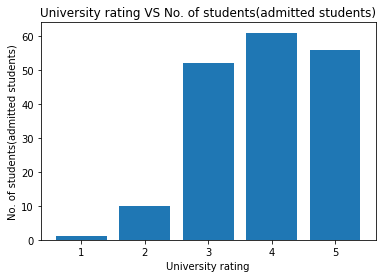

In [238]:
plt.title('University rating VS No. of students(admitted students)')
plt.xticks([1,2,3,4,5])
plt.xlabel('University rating')
plt.ylabel('No. of students(admitted students)')
plt.bar(list(university_rankings_admitted.keys()),list(university_rankings_admitted.values()))
plt.show()

In [239]:
for i in np.arange(1,6):
   print('Student count admitted from university rating-{}:  {}'.format(i,university_rankings_admitted[i]))


Student count admitted from university rating-1:  1
Student count admitted from university rating-2:  10
Student count admitted from university rating-3:  52
Student count admitted from university rating-4:  61
Student count admitted from university rating-5:  56


# z-scores

In [240]:
gre_mean=train_data_df['GRE Score'].mean()
gre_std=train_data_df['GRE Score'].std()

print("Maximum GRE Score : 340")
print("Average GRE Score : ",gre_mean)
print("Standard Deaviation : ",gre_std)

gre_diff=(train_data_df['GRE Score']-gre_mean)
train_data_df['gre_z-score']=gre_diff/gre_std

Maximum GRE Score : 340
Average GRE Score :  316.8075
Standard Deaviation :  11.473646113500477


In [241]:
TOEFL_Score_mean=train_data_df['TOEFL Score'].mean()
TOEFL_Score_std=train_data_df['TOEFL Score'].std()

print("Maximum TOEFL Score : 120")
print("Average TOEFL Score : ",TOEFL_Score_mean)
print("Standard Deaviation : ",TOEFL_Score_std)

TOEFL_Score_diff=(train_data_df['TOEFL Score']-TOEFL_Score_mean)
train_data_df['TOEFL_Score_z-score']=TOEFL_Score_diff/TOEFL_Score_std

Maximum TOEFL Score : 120
Average TOEFL Score :  107.41
Standard Deaviation :  6.069513777374129


In [242]:
CGPA_mean=train_data_df['CGPA'].mean()
CGPA_std=train_data_df['CGPA'].std()

print("Maximum CGPA Score : 10")
print("Average CGPA Score : ",CGPA_mean)
print("Standard Deaviation : ",CGPA_std)

CGPA_diff=(train_data_df['CGPA']-CGPA_mean)
train_data_df['CGPA_z-score']=CGPA_diff/CGPA_std

Maximum CGPA Score : 10
Average CGPA Score :  8.598924999999998
Standard Deaviation :  0.5963170964964317


In [243]:
train_data_df.head(5)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance_of_Admit,gre_z-score,TOEFL_Score_z-score,CGPA_z-score
0,1,337,118,4,4.5,4.5,9.65,1,0.92,1.759903,1.744786,1.762611
1,2,324,107,4,4.0,4.5,8.87,1,0.76,0.626871,-0.067551,0.454582
2,3,316,104,3,3.0,3.5,8.00,1,0.72,-0.070379,-0.561824,-1.004373
3,4,322,110,3,3.5,2.5,8.67,1,0.80,0.452559,0.426723,0.119190
4,5,314,103,2,2.0,3.0,8.21,0,0.65,-0.244691,-0.726582,-0.652212


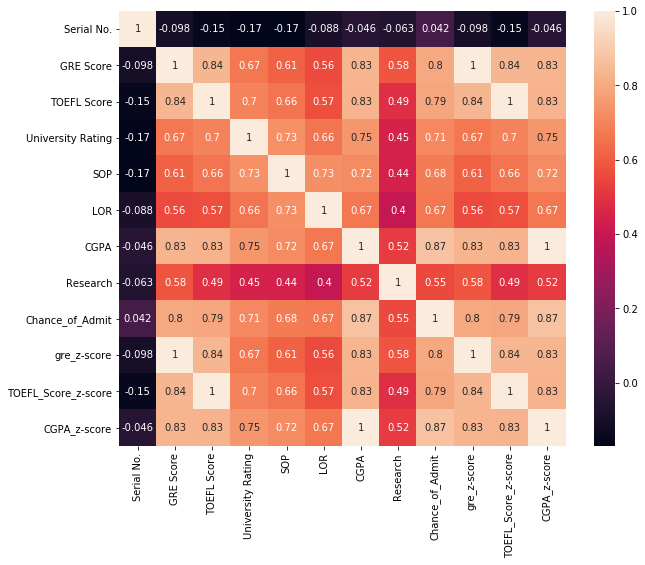

In [244]:
plt.figure(figsize=(10,8))
sns.heatmap(train_data_df.corr(), annot=True)
plt.show()

# Data Splitting

In [245]:
X = train_data_df.drop(['Chance_of_Admit'], axis=1)
Y = train_data_df['Chance_of_Admit']

In [246]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=42)

# Linear Regression

In [247]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

model=LinearRegression()
model.fit(X_train,Y_train)
print(model.coef_)
Y_pred=model.predict(X_test)
mse_LR=mean_squared_error(Y_test, Y_pred)
r2score_LR=r2_score(Y_test,Y_pred)
print('Linear Regression MSE:',mse_LR)
print('Linear Regression r2_score(1-ss(total)/ss(res)):',r2score_LR)

[0.00019195 0.00190238 0.00411694 0.00879478 0.00119721 0.01651285
 0.02630067 0.0183418  0.0001658  0.0006783  0.04410518]
Linear Regression MSE: 0.004576720874697311
Linear Regression r2_score(1-ss(total)/ss(res)): 0.7989423100992545


In [248]:
X_train_new=X_train.drop(['University Rating','SOP'],axis=1)
Y_train_new=Y_train
X_test_new=X_test.drop(['University Rating','SOP'],axis=1)
Y_test_new=Y_test

model.fit(X_train_new,Y_train_new)
print(model.coef_)
Y_New_pred=model.predict(X_test_new)
mse_LR_new=mean_squared_error(Y_test_new, Y_New_pred)
r2score_LR_new=r2_score(Y_test_new,Y_New_pred)
print('Linear Regression MSE:',mse_LR_new)
print('Linear Regression r2_score(1-ss(total)/ss(res)):',r2score_LR_new)

[0.00018421 0.0019693  0.00452039 0.02004708 0.02780071 0.01912579
 0.00017164 0.00074477 0.04662068]
Linear Regression MSE: 0.004618019583040176
Linear Regression r2_score(1-ss(total)/ss(res)): 0.7971280367094993


There is slight difference and Model got little better after droping features ['University Rating','SOP']

# Logistic Regression

In [249]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix
model_LogReg=LogisticRegression()

y_train_prob = [1 if each > 0.8 else 0 for each in Y_train]
y_test_prob = [1 if each > 0.8 else 0 for each in Y_test]

model_LogReg.fit(X_train,y_train_prob)
print(model_LogReg.coef_)

y_pred_prob=model_LogReg.predict(X_test)
print(classification_report(y_test_prob,y_pred_prob))

[[ 0.00318378 -0.06043876  0.04444767  0.72033678 -0.1093484   0.35066285
   0.86795164  0.72868234  0.95395836  0.62210029  1.95646967]]
             precision    recall  f1-score   support

          0       0.98      0.98      0.98        86
          1       0.94      0.94      0.94        34

avg / total       0.97      0.97      0.97       120



In [250]:
cm=confusion_matrix(y_test_prob,y_pred_prob)

Text(33,0.5,'Actual')

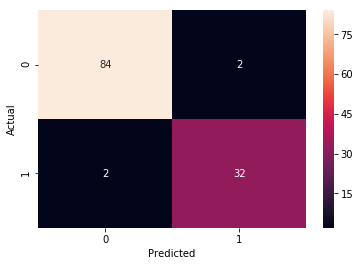

In [251]:
sns.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [252]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print("Accuracy Score = ",accuracy_score(y_test_prob, y_pred_prob))
print("precision_score: ", precision_score(y_test_prob,model_LogReg.predict(X_test)))
print("recall_score: ", recall_score(y_test_prob,model_LogReg.predict(X_test)))
print("f1_score: ",f1_score(y_test_prob,model_LogReg.predict(X_test)))

Accuracy Score =  0.9666666666666667
precision_score:  0.9411764705882353
recall_score:  0.9411764705882353
f1_score:  0.9411764705882353


# SVM

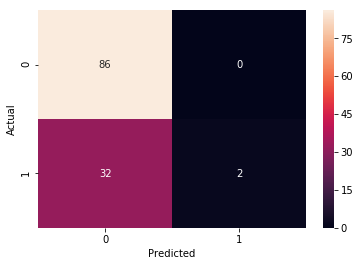

In [253]:
from sklearn.svm import SVC

svmmodel = SVC()
svmmodel.fit(X_train,y_train_prob)
Y_Pred=svmmodel.predict(X_test)
cm_SVM=confusion_matrix(y_test_prob,Y_Pred)


sns.heatmap(cm_SVM,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [254]:
print("SVM_Accuracy Score = ",accuracy_score(y_test_prob, Y_Pred))
print("SVM_precision_score: ", precision_score(y_test_prob,svmmodel.predict(X_test)))
print("SVM_recall_score: ", recall_score(y_test_prob,svmmodel.predict(X_test)))
print("SVM_f1_score: ",f1_score(y_test_prob,svmmodel.predict(X_test)))

SVM_Accuracy Score =  0.7333333333333333
SVM_precision_score:  1.0
SVM_recall_score:  0.058823529411764705
SVM_f1_score:  0.1111111111111111


# Decision Tree

In [255]:
from sklearn.tree import DecisionTreeRegressor
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train,Y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [256]:
y_pred=dt_model.predict(X_test)

print("DT_r2_score: ", r2_score(Y_test,y_pred))


DT_r2_score:  0.6373170172158795


# K-NN

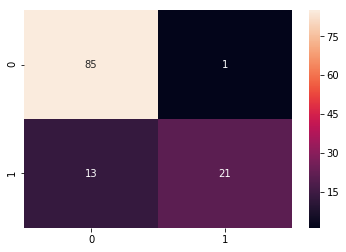

In [257]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

knn_model=KNeighborsClassifier(n_neighbors=11, p=2,metric='euclidean')
knn_model.fit(X_train,y_train_prob)
Y_Pred=knn_model.predict(X_test)
cm_KNN=confusion_matrix(y_test_prob,Y_Pred)

sns.heatmap(cm_KNN,annot=True)

In [258]:
print("KNN_Accuracy Score = ",accuracy_score(y_test_prob, Y_Pred))
print("KNN_precision_score: ", precision_score(y_test_prob,knn_model.predict(X_test)))
print("KNN_recall_score: ", recall_score(y_test_prob,knn_model.predict(X_test)))
print("KNN_f1_score: ",f1_score(y_test_prob,knn_model.predict(X_test)))

KNN_Accuracy Score =  0.8833333333333333
KNN_precision_score:  0.9545454545454546
KNN_recall_score:  0.6176470588235294
KNN_f1_score:  0.75


SUMMARY:Logistic Regression model performs better  with 96% accuracy
    
    Classifiers (Accuracy_Score):
        
        Logistic Regression:96.6%
        SVC                :73.3%
        KNN                :88.3%
        
        
    Regression (R2_Score):
        
        Linear Regression      :79.89%
        DecisionTree Regressor : 63.73%
        
  